In [1]:
# script to make TOF plot of CO oxidation on pt
# kind of based off of this example: https://cantera.org/examples/python/surface_chemistry/catalytic_combustion.py.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct
import pandas as pd
from scipy.optimize import fsolve


In [3]:
# Define reactor conditions
CO_0 = 1.0  # kmol / m^3
O2_0 = 1.0  # kmol / m^3
Ar_0 = 1.0  # kmol / m^3
REACTOR_VOLUME = 1.0  # m^3
REACTOR_TEMPERATURE = 900  # K
REACTOR_PRESSURE = 100000.0  # 1 bar = 100000 Pa
MAX_SIMULATION_TIME = 1.0
CONCENTRATIONS = {
    'CO(4)': 0.1,
    'O2(2)': 0.1,
    'Ar': 0.8,
}

In [4]:
x_CO = CONCENTRATIONS['CO(4)']
x_O2 = CONCENTRATIONS['O2(2)']
x_Ar = CONCENTRATIONS['Ar']


In [5]:
# Read in the mechanism
model_file = 'chem_annotated.cti'
gas = ct.Solution(model_file, "gas")
surf = ct.Interface(model_file, "surface1", [gas])

In [118]:
# initialize T and P
gas.TPX = REACTOR_TEMPERATURE, REACTOR_PRESSURE, CONCENTRATIONS
surf.TP = REACTOR_TEMPERATURE, REACTOR_PRESSURE

volume_flow = 1.0

# Catalyst settings (really need to double check these)
catalyst_weight = 4.24e-3
cat_site_per_wt = 5*61.67*1e-6*1e3 # [mol/kg] 1e-6mol/micromole, 1000g/kg
site_density = (
    surf.site_density * 1000
)  # [mol/m^2]cantera uses kmol/m^2, convert to mol/m^2
cat_area = (catalyst_weight * cat_site_per_wt) / site_density  # [m^3]
surf.coverages = "X(1):1.0"


In [119]:
gas_reactor = ct.IdealGasReactor(gas)
gas_reactor.volume = REACTOR_VOLUME
surface_reactor = ct.ReactorSurface(surf, gas_reactor, A=cat_area)

# set up mass flow controllers
inlet = ct.Reservoir(gas)
exhaust = ct.Reservoir(gas)

In [120]:
N = 10000
delta_t = 1e-2
t = np.arange(0, N * delta_t, delta_t)
X_cov = np.zeros(len(t))
CO_cov = np.zeros(len(t))
O_cov = np.zeros(len(t))
CO2_cov = np.zeros(len(t))



In [121]:
for i in range(0, len(t)):
    X_cov[i] = surf.coverages[surf.species_names.index('X(1)')]
    CO_cov[i] = surf.coverages[surf.species_names.index('OCX(14)')]
    O_cov[i] = surf.coverages[surf.species_names.index('OX(8)')]
    CO2_cov[i] = surf.coverages[surf.species_names.index('CO2X(13)')]
    surf.advance_coverages(delta_t)

In [122]:
# surf.advance_coverages(delta_t)

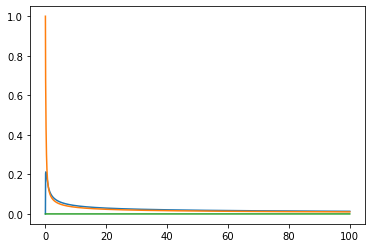

In [123]:
plt.plot(t, CO_cov, t, X_cov, t, O_cov)